In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra/kaggle/input/yawn-eye-dataset-new
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_163.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_330.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_498.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_167.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_76.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_439.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_226.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_168.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_96.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_64.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_373.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_115.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_20.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/Closed/_559.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/test/

In [2]:
# Importing the required libraries
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [3]:
#locating of training dataset
train_dir = "../input/yawn-eye-dataset-new/dataset_new/train/"

#locating of dataset used for testing
test_dir = "../input/yawn-eye-dataset-new/dataset_new/test/"

In [4]:
# Function to load images and labels from a given directory
def load_images(directory):
    """ Load images and corresponding labels from the specified directory.
    Args:
        directory (str): The path to the directory containing the images.
    Returns:
        numpy.ndarray: An array of images (as NumPy arrays).
        list: A list of corresponding labels for each image.
    """
    images = []
    labels = []

        # Iterate over subdirectories (categories)
    for category in os.listdir(directory):
        # Iterate over image files in the subdirectory
        for filename in tqdm(os.listdir(os.path.join(directory, category))):
            image_path = os.path.join(directory, category, filename)
            # Read the image and preprocess it
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            images.append(image)
            labels.append(category)
    
    images = np.array(images,dtype='float32')
    return images, labels

In [5]:
# Load training and testing images and labels
X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

In [6]:
# Normalize the pixel values to range [0, 1]
X_train = X_train / 255.
X_test = X_test / 255.

In [7]:
# Encode labels into categorical form

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# Build the CNN model
cnn = Sequential()
cnn.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(224, 224, 3)))

cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=2))

cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())

cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())

cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))
cnn.add(Dense(units=4, activation='softmax'))

In [9]:
# Print model summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 64)        1

In [10]:
# Compile the model
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Define callbacks for training
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, mode='max', verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=5, mode='max', verbose=1, factor=0.1, min_lr=0.001)
checkpoint_filename = 'checkpoint/'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename, monitor='val_accuracy', verbose=1, 
                                   save_best_only=True, save_weights_only=True, mode='max')

# Train the model
r = cnn.fit(x=X_train, y=y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), 
            callbacks=[early_stopping, reduce_lr, model_checkpoint])


Epoch 1/50
78/78 [==============================] - 39s 489ms/step - loss: 0.5996 - accuracy: 0.7296 - val_loss: 5.2645 - val_accuracy: 0.2517

Epoch 00001: val_accuracy improved from -inf to 0.25173, saving model to checkpoint/
Epoch 2/50
78/78 [==============================] - 38s 487ms/step - loss: 0.4143 - accuracy: 0.7945 - val_loss: 4.5555 - val_accuracy: 0.2517

Epoch 00002: val_accuracy did not improve from 0.25173
Epoch 3/50
78/78 [==============================] - 37s 476ms/step - loss: 0.3385 - accuracy: 0.8379 - val_loss: 5.1271 - val_accuracy: 0.4249

Epoch 00003: val_accuracy improved from 0.25173 to 0.42494, saving model to checkpoint/
Epoch 4/50
78/78 [==============================] - 38s 491ms/step - loss: 0.3014 - accuracy: 0.8703 - val_loss: 2.5265 - val_accuracy: 0.4134

Epoch 00004: val_accuracy did not improve from 0.42494
Epoch 5/50
78/78 [==============================] - 39s 496ms/step - loss: 0.2445 - accuracy: 0.8946 - val_loss: 4.6042 - val_accuracy: 0.314

In [12]:
# Load the best weights
cnn.load_weights(checkpoint_filename)

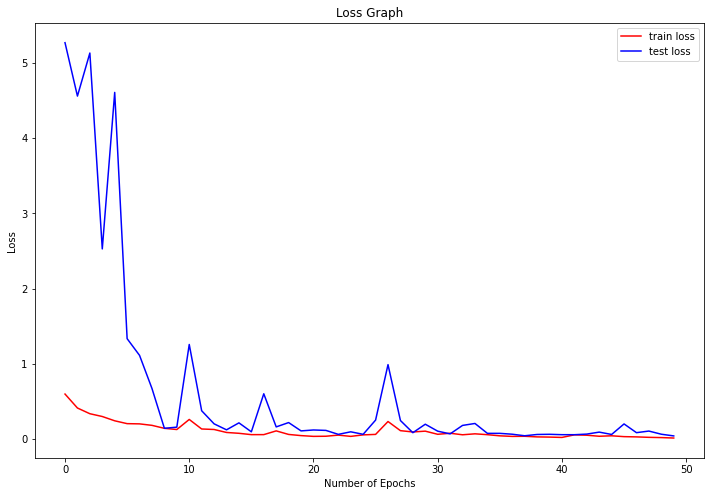

In [13]:
# Plot the training and testing loss
plt.figure(figsize=(12, 8))
plt.plot(r.history['loss'], 'r', label='train loss')
plt.plot(r.history['val_loss'], 'b', label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()

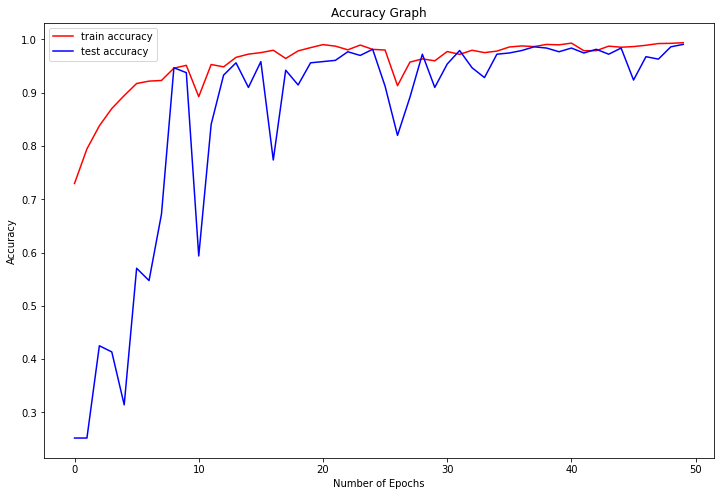

In [14]:
# Plot the training and testing accuracy
plt.figure(figsize=(12, 8))
plt.plot(r.history['accuracy'], 'r', label='train accuracy')
plt.plot(r.history['val_accuracy'], 'b', label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()

In [15]:
# Save the trained model
cnn.save(filepath='drowsiness_detector.model', save_format='h5')

# Load the saved model
model = load_model(filepath='drowsiness_detector.model')